<a href="https://colab.research.google.com/github/burredurga/Karkhana.io/blob/main/Copy_of_Untitled37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

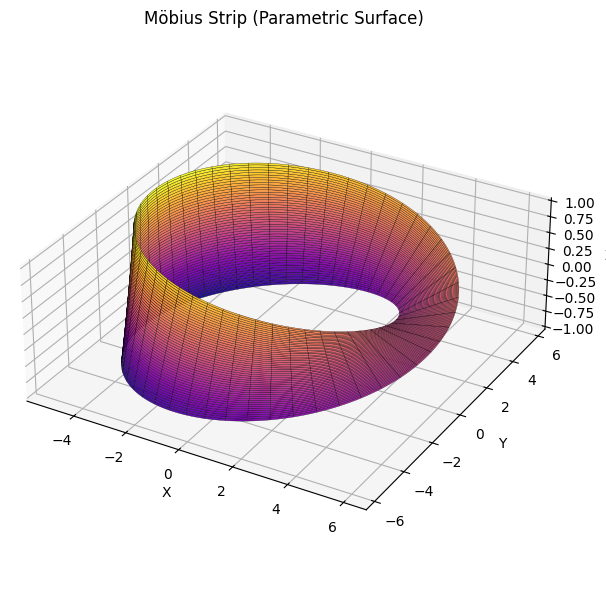

Surface Area ≈ 0.0200
Edge Length ≈ 63.1490


In [ ]:
import numpy as np
from scipy.integrate import simpson
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R, w, n):
        self.R = R
        self.w = w
        self.n = n

        # Create parametric grid
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)

        # Compute 3D mesh points on the surface
        self.X, self.Y, self.Z = self._compute_mesh()

    def _compute_mesh(self):
        U, V = self.U, self.V
        R = self.R
        X = (R + V * np.cos(U / 2)) * np.cos(U)
        Y = (R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def surface_area(self):

        # Calculate partial derivatives
        dXdu, dXdv = np.gradient(self.X, axis=(0, 1))
        dYdu, dYdv = np.gradient(self.Y, axis=(0, 1))
        dZdu, dZdv = np.gradient(self.Z, axis=(0, 1))

        # Cross product of partial derivatives
        cross_x = dYdu * dZdv - dZdu * dYdv
        cross_y = dZdu * dXdv - dXdu * dZdv
        cross_z = dXdu * dYdv - dYdu * dXdv

        # Magnitude of cross product = local area element
        area_density = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        # Integrate over u and v with Simpson's rule
        area = simpson(simpson(area_density, self.v, axis=0), self.u)
        return area

    def edge_length(self):

        def edge_path(v_val):
            u = self.u
            x = (self.R + v_val * np.cos(u / 2)) * np.cos(u)
            y = (self.R + v_val * np.cos(u / 2)) * np.sin(u)
            z = v_val * np.sin(u / 2)
            return np.stack((x, y, z), axis=1)

        edge1 = edge_path(self.w / 2)
        edge2 = edge_path(-self.w / 2)

        def path_length(points):
            return np.sum([euclidean(points[i], points[i + 1]) for i in range(len(points) - 1)])

        return path_length(edge1) + path_length(edge2)

    def visualize(self):

        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, cmap='plasma', edgecolor='k', linewidth=0.2, alpha=0.95)
        ax.set_title("Möbius Strip (Parametric Surface)")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_box_aspect([1, 1, 0.4])  # Aspect ratio for better visualization
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    mobius = MobiusStrip(R=5, w=2, n=200)
    mobius.visualize()
    print(f"Surface Area ≈ {mobius.surface_area():.4f}")
    print(f"Edge Length ≈ {mobius.edge_length():.4f}")
